# Imporring libraries

In [53]:
#loading the data set
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Loading the data set

In [54]:
# loading the data set 
dataset = pd.read_csv('/Users/sharumathan/Desktop/EDITH_FDM/dataset.csv')

In [55]:
dataset.head()

,Unnamed: 0,Company Name,Car Name,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Engine Number,Chassis Number,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories,Price
0,0,Renault,Kwid,Petrol,Needs Replacement,2022,First,TN-XX-XX-XXXX,45796,239-73-7748-87,6169-3043-3070,NaN,Blue,Major Service at 123653 km,No Current Insurance,Not Available,NaN,531720.0
1,1,MG,Astor,Petrol,Needs Replacement,2022,Fourth,JS-XX-XX-XXXX,179853,304-67-9740-52,8429-2985-7840,Automatic (Tiptronic),Blue,Full Service History,No Current Insurance,Not Available,"Sunroof, Alloy Wheels, Music System, GPS",1185240.0
2,2,MG,Gloster,Petrol,New,2015,Second,DL-XX-XX-XXXX,27017,375-87-9097-89,9769-1737-7783,Automatic,NaN,Full Service History,No Current Insurance,Not Available,"Sunroof, Alloy Wheels, GPS",1200360.0
3,3,Toyota,Etios,Diesel,Used,2022,Fourth,TS-XX-XX-XXXX,72664,697-23-7552-35,3202-6143-7058,NaN,Gold,,Valid Until [date],Not Available,"Sunroof, Alloy Wheels, Music System, Leather S...",683760.0
4,4,Kia,Carens,Petrol,New,2023,Second,KL-XX-XX-XXXX,37606,582-36-2284-83,1901-8986-3880,NaN,Silver,No Service Record,Valid Until [date],Available,"Alloy Wheels, GPS",1471080.0


# Checking the distribution of price 

/var/folders/6m/3qdb66f938jg7mfpj7vgsxr40000gn/T/ipykernel_26570/70000040.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset['Price'], shade=True, color='green', ax=axes[2])


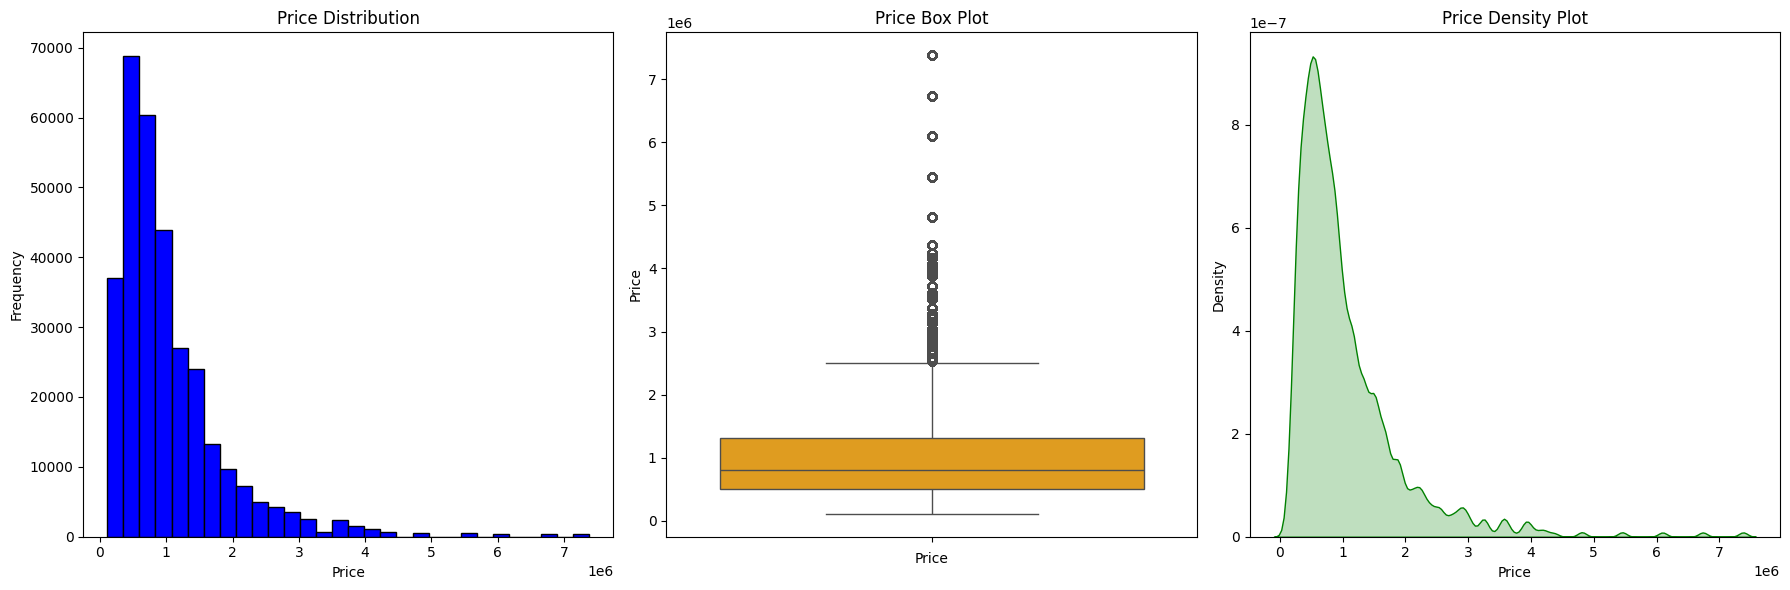

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x3 grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First plot: Price Histogram
axes[0].hist(dataset['Price'], bins=30, color='blue', edgecolor='black')
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Second plot: Price Box Plot
sns.boxplot(dataset['Price'], ax=axes[1], color='orange')
axes[1].set_title('Price Box Plot')
axes[1].set_xlabel('Price')

# Third plot: Price Density Plot
sns.kdeplot(dataset['Price'], shade=True, color='green', ax=axes[2])
axes[2].set_title('Price Density Plot')
axes[2].set_xlabel('Price')

# Adjust layout and display
plt.tight_layout()
plt.show()


# Removing the outliers and reduce skewness and normalizing

In [6]:
dataset['Price'] = np.sqrt(dataset['Price'])

In [7]:
Q1 = dataset['Price'].quantile(0.25)
Q3 = dataset['Price'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset['Price'] >= (Q1 - 1.5 * IQR)) & (dataset['Price'] <= (Q3 + 1.5 * IQR))]


In [8]:
from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset['Price'])) < 3)]


/var/folders/6m/3qdb66f938jg7mfpj7vgsxr40000gn/T/ipykernel_26570/70000040.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset['Price'], shade=True, color='green', ax=axes[2])


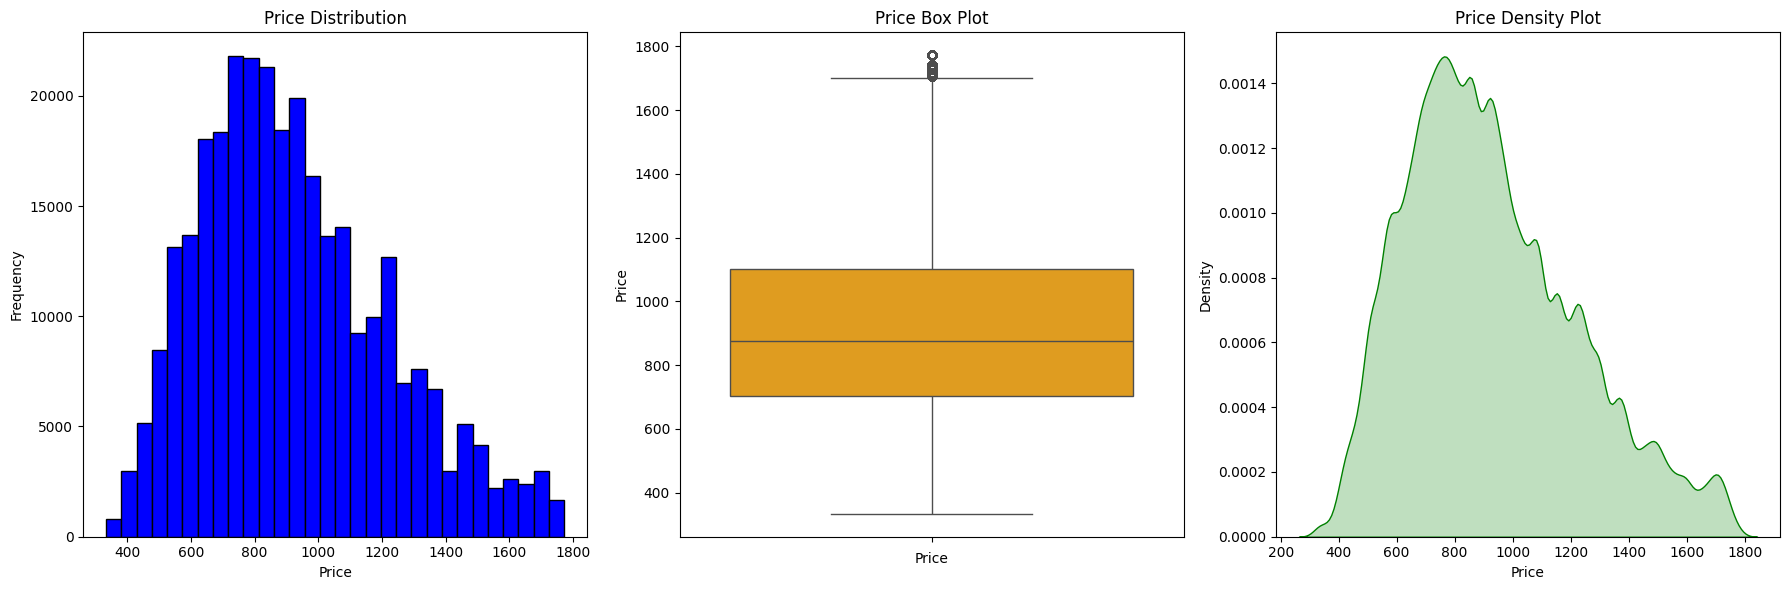

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x3 grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First plot: Price Histogram
axes[0].hist(dataset['Price'], bins=30, color='blue', edgecolor='black')
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Second plot: Price Box Plot
sns.boxplot(dataset['Price'], ax=axes[1], color='orange')
axes[1].set_title('Price Box Plot')
axes[1].set_xlabel('Price')

# Third plot: Price Density Plot
sns.kdeplot(dataset['Price'], shade=True, color='green', ax=axes[2])
axes[2].set_title('Price Density Plot')
axes[2].set_xlabel('Price')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [10]:
dataset.shape

(305128, 18)

In [58]:
dataset.isnull().sum()

Unnamed: 0                      0
Company Name                    0
Car Name                        0
Fuel Type                       0
Tyre Condition                  0
Make Year                       0
Owner Type                      0
Registration Number             0
Mileage                         0
Engine Number                   0
Chassis Number                  0
Transmission Type           79145
Body Color                  34704
Service Record                  0
Insurance                       0
Registration Certificate        0
Accessories                 62650
Price                           0
dtype: int64

# Filling the null values in Transmission Type with ' unknown_transmission '

In [11]:
dataset['Transmission Type'].fillna('unknown_transmission' ,inplace=True)

/var/folders/6m/3qdb66f938jg7mfpj7vgsxr40000gn/T/ipykernel_26570/2981917891.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Transmission Type'].fillna('unknown_transmission' ,inplace=True)


# Droping the null valued rows for Accessories column from the data set 

In [12]:
dataset.dropna(subset=['Accessories'], inplace=True)

# One hot encoding the accessories column

In [13]:
import pandas as pd

accessories_list = ['Music System', 'Sunroof', 'Alloy Wheels', 'GPS', 'Leather Seats']


def accessories_one_hot_encoding(row, accessories_list):
    accessories = row.split(', ') 
    encoded_values = {acc: 1 if acc in accessories else 0 for acc in accessories_list}
    return pd.Series(encoded_values)

# Apply the function to the Accessories column
accessories_encoded = dataset['Accessories'].apply(accessories_one_hot_encoding, accessories_list=accessories_list)

# Concatenate the original dataset with the one-hot encoded accessories columns
dataset = pd.concat([dataset, accessories_encoded], axis=1)

# Drop the original 'Accessories' column if you no longer need it
dataset.drop('Accessories', axis=1, inplace=True)




# Encoding the category columns using Label Encoding

In [14]:
car_name_neumaric = {}
i =0
for car_name in dataset['Car Name'].unique():
    car_name_neumaric[car_name] = i
    i = i+1
print(car_name_neumaric)

{'Astor': 0, 'Gloster': 1, 'Etios': 2, 'Carens': 3, 'XUV300': 4, 'Jazz': 5, 'Hector Plus': 6, 'Thar': 7, 'Creta': 8, 'Sunny': 9, 'Vento': 10, 'i10': 11, 'Venue': 12, 'Civic': 13, 'Altroz': 14, 'Micra': 15, 'Corolla': 16, 'Punch': 17, 'Bolero': 18, 'Hector': 19, 'Accord': 20, 'Ignis': 21, 'Verna': 22, 'Land Cruiser': 23, 'Tiago': 24, 'Kwid': 25, 'Tiguan': 26, 'Safari': 27, 'Carnival': 28, 'Sonet': 29, 'Triber': 30, 'Ciaz': 31, 'Marazzo': 32, 'Kicks': 33, 'Camry': 34, 'Nexon': 35, 'Glanza': 36, 'Dzire': 37, 'Innova Crysta': 38, 'T-Roc': 39, 'Polo': 40, 'Yaris': 41, 'Kiger': 42, 'Exter': 43, 'Omni': 44, 'City': 45, 'X-Trail': 46, 'Brezza': 47, 'i20': 48, 'Celerio': 49, 'Harrier': 50, 'Taigun': 51, 'XUV700': 52, 'Scorpio': 53, 'WR-V': 54, 'Eeco': 55, 'Urban Cruiser': 56, 'Aura': 57, 'Baleno': 58, 'Magnite': 59, 'Alto': 60, 'Swift': 61, 'Innova': 62, 'Alcazar': 63, 'Amaze': 64, 'S-Presso': 65, 'Tigor': 66, 'Santro': 67, 'Seltos': 68, 'KUV100': 69, 'CR-V': 70, 'Ertiga': 71, 'Ioniq': 72, 'For

In [15]:
dataset['Registration Certificate'].replace(' ', 'Not Available',inplace = True)

/var/folders/6m/3qdb66f938jg7mfpj7vgsxr40000gn/T/ipykernel_26570/3114564629.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Registration Certificate'].replace(' ', 'Not Available',inplace = True)


In [16]:
dataset.replace({'Company Name':{'MG':0,'Hyundai':1,'Nissan':2,'TATA':3,'Volkswagen':4,'Mahindra':5,'Maruti Suzuki':6,'Renault':7,'Toyota':8,'Honda':9,'Kia':10}},inplace = True)

dataset.replace({'Fuel Type':{'Diesel':0,'Petrol':1}},inplace = True)

dataset.replace({'Tyre Condition':{'Needs Replacement':0,'New':1,'Used':2}},inplace = True)

dataset.replace({'Owner Type':{'First':0,'Second':1,'Third':2,'Fourth':3}},inplace = True)

dataset.replace({'Registration Number':{'DL-XX-XX-XXXX':0,'AP-XX-XX-XXXX':1,'MH-XX-XX-XXXX':2,'KA-XX-XX-XXXX':3,'TN-XX-XX-XXXX':4,'TS-XX-XX-XXXX':5,'JS-XX-XX-XXXX':6,'MP-XX-XX-XXXX':7,'KL-XX-XX-XXXX':8,'PB-XX-XX-XXXX':9}},inplace = True)

dataset.replace({'Transmission Type':{'Automatic':0,'Automatic (Tiptronic)':1,'Manual':2,'unknown_transmission':3}},inplace = True)

dataset.replace({'Insurance':{'Valid Until [date]':0,'No Current Insurance':1}},inplace = True)

dataset.replace({'Registration Certificate':{'Not Available':0,'Available':1}},inplace = True)

dataset.replace({'Car Name':car_name_neumaric},inplace = True)

/var/folders/6m/3qdb66f938jg7mfpj7vgsxr40000gn/T/ipykernel_26570/1145002401.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Company Name':{'MG':0,'Hyundai':1,'Nissan':2,'TATA':3,'Volkswagen':4,'Mahindra':5,'Maruti Suzuki':6,'Renault':7,'Toyota':8,'Honda':9,'Kia':10}},inplace = True)
/var/folders/6m/3qdb66f938jg7mfpj7vgsxr40000gn/T/ipykernel_26570/1145002401.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Fuel Type':{'Diesel':0,'Petrol':1}},inplace = True)
/var/folders/6m/3qdb66f938jg7mfp

# Checking for white space and filling with null values

In [17]:
import pandas as pd
def is_whitespace(value):
    return isinstance(value, str) and value.strip() == ''

whitespace_mask = dataset.applymap(is_whitespace)

whitespace_sum_by_column = whitespace_mask.apply(sum)

print("Sum of white spaces by column:")
print(whitespace_sum_by_column)


/var/folders/6m/3qdb66f938jg7mfpj7vgsxr40000gn/T/ipykernel_26570/500256679.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  whitespace_mask = dataset.applymap(is_whitespace)


Sum of white spaces by column:
Unnamed: 0                      0
Company Name                    0
Car Name                        0
Fuel Type                       0
Tyre Condition                  0
Make Year                       0
Owner Type                      0
Registration Number             0
Mileage                         0
Engine Number                   0
Chassis Number                  0
Transmission Type               0
Body Color                      0
Service Record              60964
Insurance                   81481
Registration Certificate        0
Price                           0
Music System                    0
Sunroof                         0
Alloy Wheels                    0
GPS                             0
Leather Seats                   0
dtype: int64


In [18]:
dataset['Service Record'].replace(" " ,None, inplace=True)

/var/folders/6m/3qdb66f938jg7mfpj7vgsxr40000gn/T/ipykernel_26570/430489438.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Service Record'].replace(" " ,None, inplace=True)


In [19]:
dataset['Insurance'].replace('   ' ,None, inplace=True)

/var/folders/6m/3qdb66f938jg7mfpj7vgsxr40000gn/T/ipykernel_26570/4170135308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Insurance'].replace('   ' ,None, inplace=True)


In [20]:
dataset.dropna(subset=['Insurance','Service Record','Body Color'], inplace=True)

# Checking the remaining outliers

In [21]:
from scipy import stats
dataset['Price'] = pd.to_numeric(dataset['Price'], errors='coerce')

z_scores = np.abs(stats.zscore(dataset['Price'].dropna()))
outliers = (z_scores > 3).sum()

print("Number of outliers in 'Price':", outliers)

Number of outliers in 'Price': 0


# Checking null values

In [22]:
dataset.isnull().sum()

Unnamed: 0                  0
Company Name                0
Car Name                    0
Fuel Type                   0
Tyre Condition              0
Make Year                   0
Owner Type                  0
Registration Number         0
Mileage                     0
Engine Number               0
Chassis Number              0
Transmission Type           0
Body Color                  0
Service Record              0
Insurance                   0
Registration Certificate    0
Price                       0
Music System                0
Sunroof                     0
Alloy Wheels                0
GPS                         0
Leather Seats               0
dtype: int64

# Checking the co relations using heatmap

<Axes: >

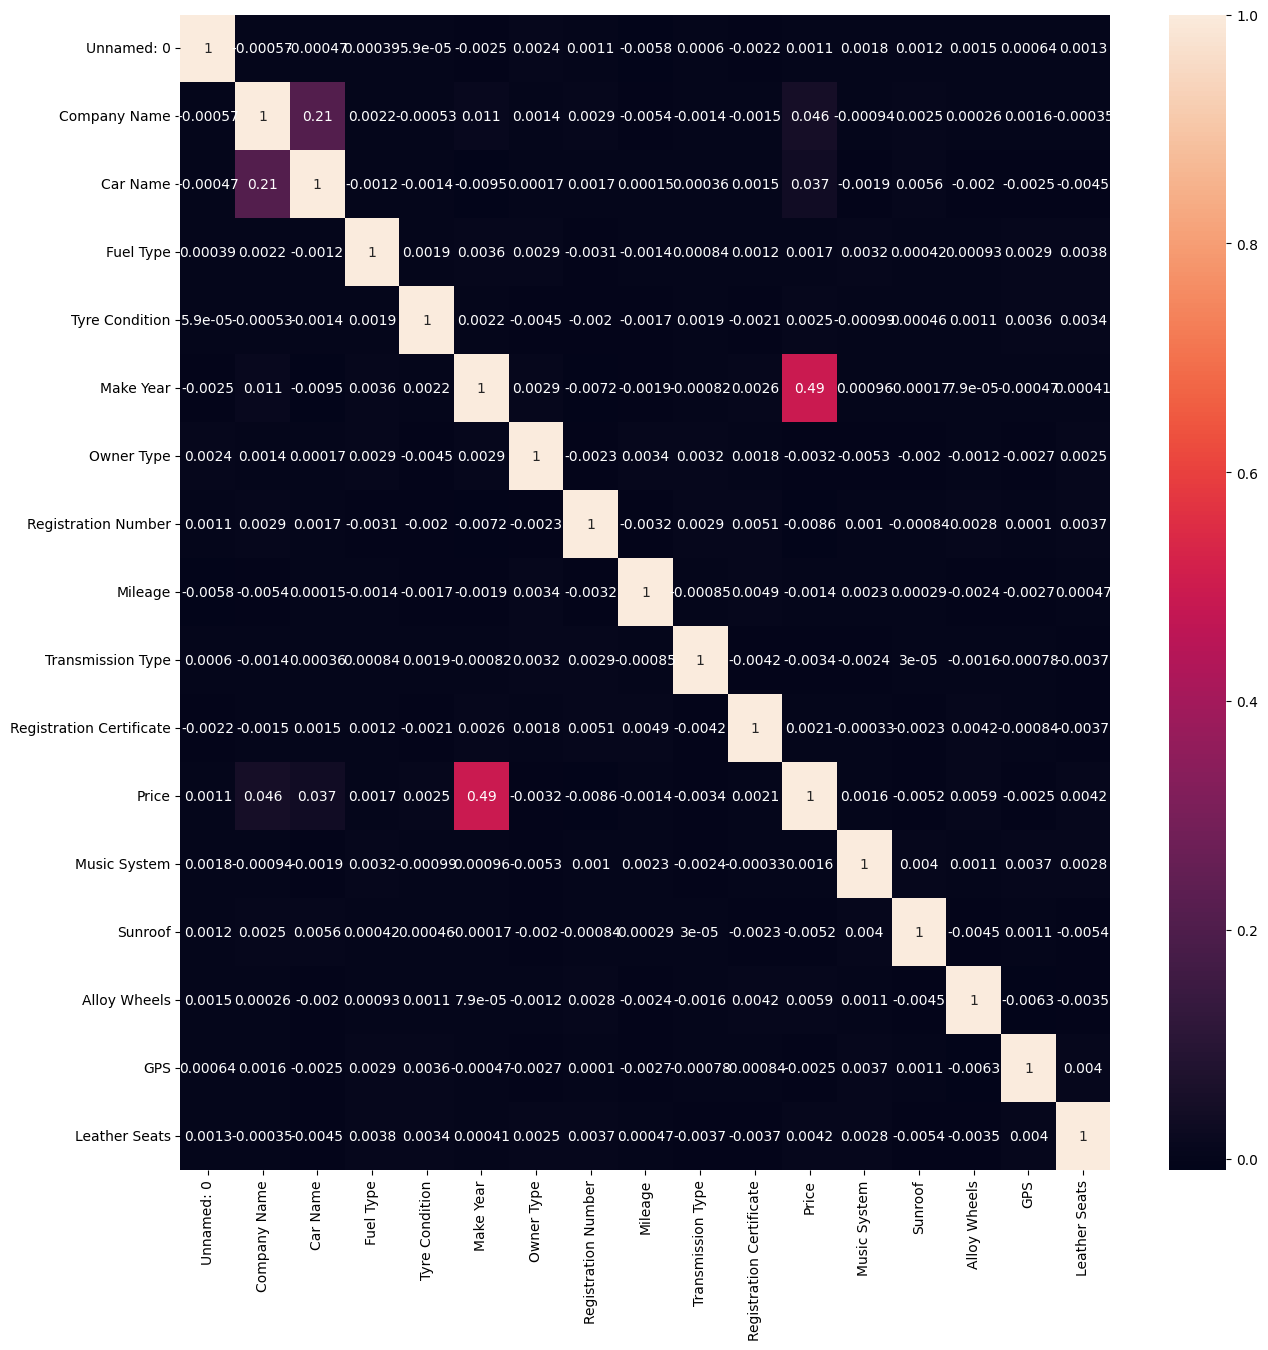

In [23]:
import seaborn as sns
s = dataset.select_dtypes(include = "number").corr()
plt.figure(figsize = (15,15))
sns.heatmap(s,annot=True)

In [24]:
unwanted_columns = ['Unnamed: 0','Engine Number','Chassis Number','Body Color','Service Record','Insurance']
dataset.drop(columns = unwanted_columns,inplace = True)

In [25]:
numerical_columns = ['Make Year','Mileage']
categarical_column = ['Company Name','Car Name','Fuel Type','Tyre Condition','Owner Type','Registration Number','Transmission Type','Registration Certificate']

# Normalizing the numerical column values using StandardScaler

In [26]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object

scaler_catogorie = StandardScaler()

# Apply the scaler to the numerical columns
dataset[numerical_columns] = scaler_catogorie.fit_transform(dataset[numerical_columns])

scaler_price = StandardScaler()
dataset['Price'] = scaler_price.fit_transform(dataset['Price'].values.reshape(-1, 1))



# Saving the Scalers

In [27]:
import pickle
with open('scaler_2_category.pkl', 'wb') as file:
    pickle.dump(scaler_catogorie, file)

with open('scaler_2_price.pkl', 'wb') as file:
    pickle.dump(scaler_price, file)

# Declaring X and Y

In [28]:
X = dataset.drop(['Price'],axis=1)
Y = dataset['Price']

In [29]:
X.head()

,Company Name,Car Name,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Transmission Type,Registration Certificate,Music System,Sunroof,Alloy Wheels,GPS,Leather Seats
1,0,0,1,0,1.192086,3,6,1.375719,1,0,1,1,1,1,0
4,10,3,1,1,1.580857,1,8,-1.153432,3,1,0,0,1,1,0
10,1,8,1,2,1.580857,2,5,-0.211270,2,0,1,0,0,1,0
11,2,9,0,0,0.803315,3,8,-1.595923,3,0,1,1,0,0,1
18,9,13,0,0,-0.751770,3,6,-0.068408,0,0,0,1,0,0,0


# Spliting training testing Datas

In [30]:
X_train , X_test ,Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [31]:
from sklearn. linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 

# Building model using LinearRegression and checking matrices

In [32]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


# Fit the regression model
lr = LinearRegression()
lr.fit(X_train, Y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

# Generate a regression report
print("Regression Model Performance Report:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Regression Model Performance Report:
Mean Absolute Error (MAE): 0.7057
Mean Squared Error (MSE): 0.7524
Root Mean Squared Error (RMSE): 0.8674
R² Score: 0.2402


In [33]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(lr, X, Y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cross_val_scores}")
print(f"Mean Cross-validated R² score: {cross_val_scores.mean():.4f}")

Cross-validated R² scores: [0.24684795 0.2440434  0.24537651 0.24380278 0.24779237]
Mean Cross-validated R² score: 0.2456


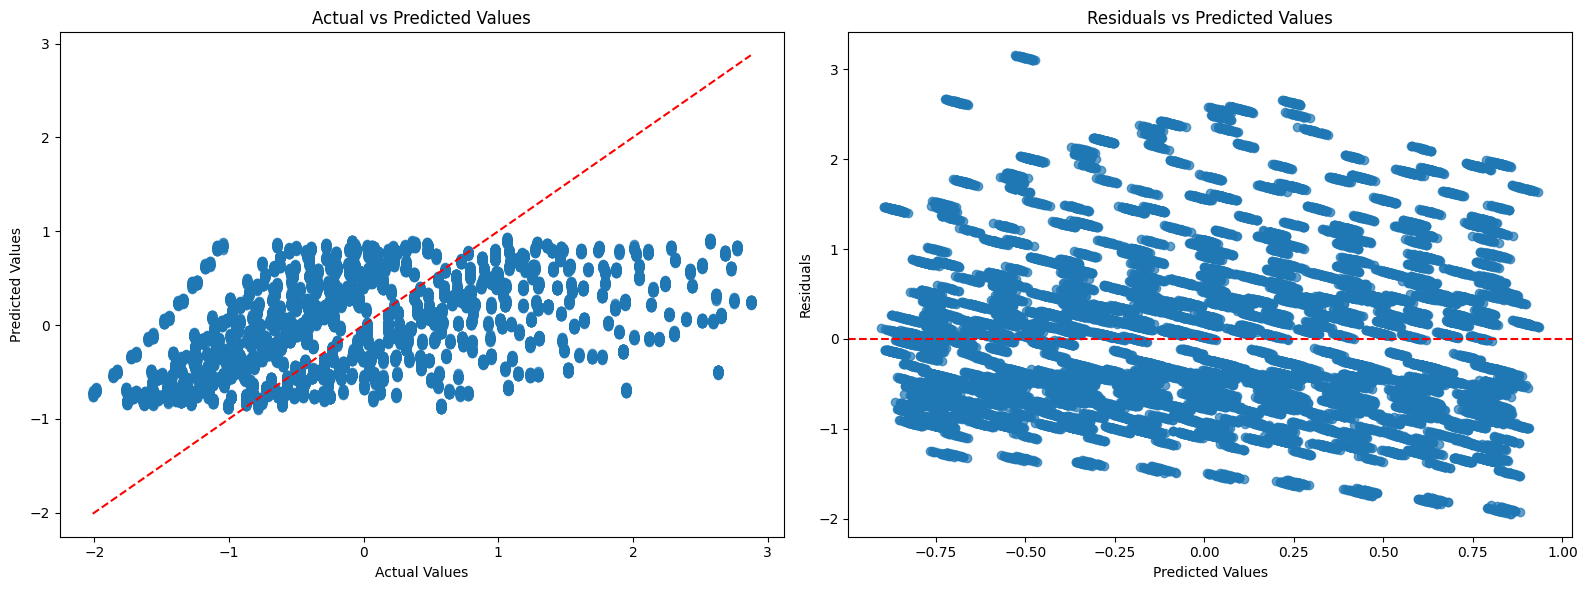

In [34]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of actual vs. predicted values
axs[0].scatter(Y_test, y_pred, alpha=0.7)
axs[0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Line of perfect prediction
axs[0].set_title('Actual vs Predicted Values')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')

# Residuals plot
residuals = Y_test - y_pred
axs[1].scatter(y_pred, residuals, alpha=0.7)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals vs Predicted Values')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# Building a model using the RandomForestRegressor and checking matrices

In [35]:
# Fit the regression model
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

# Generate a regression report
print("Regression Model Performance Report:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Regression Model Performance Report:
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R² Score: 1.0000


In [36]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(rf, X, Y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cross_val_scores}")
print(f"Mean Cross-validated R² score: {cross_val_scores.mean():.4f}")

Cross-validated R² scores: [1. 1. 1. 1. 1.]
Mean Cross-validated R² score: 1.0000


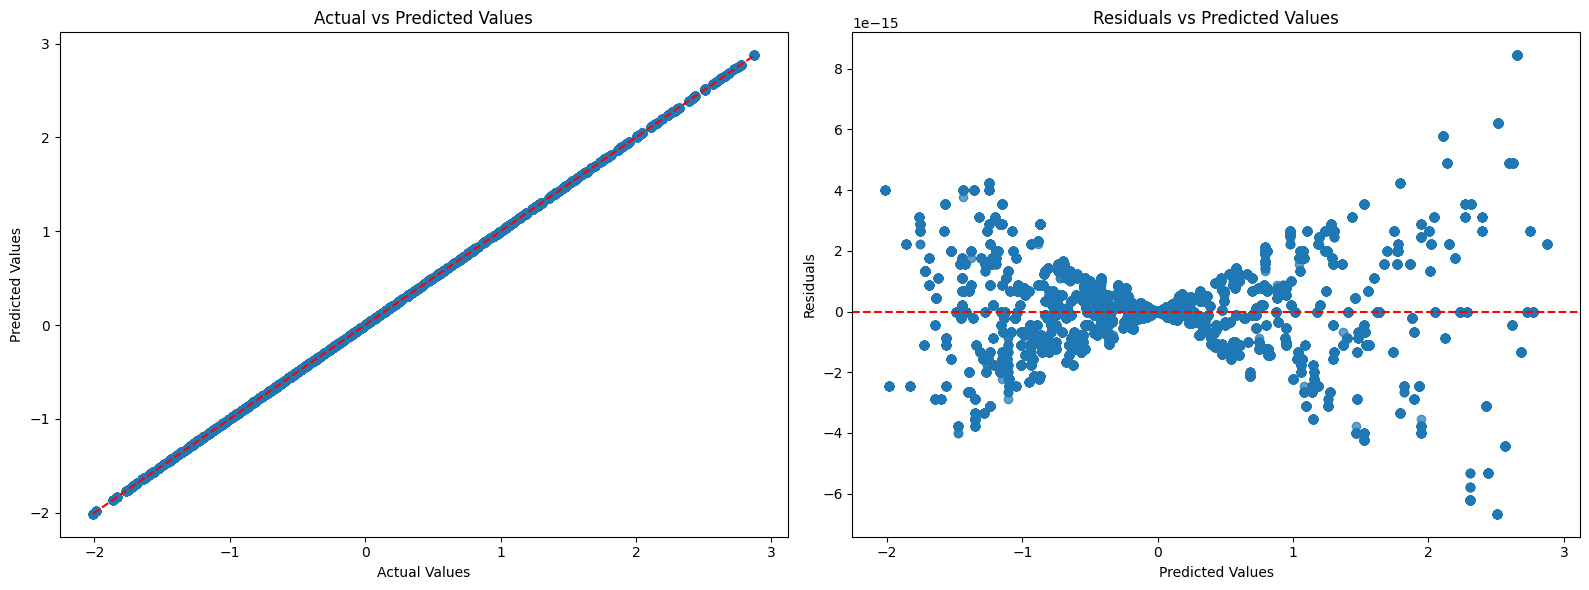

In [37]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of actual vs. predicted values
axs[0].scatter(Y_test, y_pred, alpha=0.7)
axs[0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Line of perfect prediction
axs[0].set_title('Actual vs Predicted Values')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')

# Residuals plot
residuals = Y_test - y_pred
axs[1].scatter(y_pred, residuals, alpha=0.7)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals vs Predicted Values')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# Building a model using the GradientBoostingRegressor and checking matrices

In [38]:
# Fit the regression model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
xgb = GradientBoostingRegressor()
xgb.fit(X_train,Y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

# Generate a regression report
print("Regression Model Performance Report:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Regression Model Performance Report:
Mean Absolute Error (MAE): 0.2330
Mean Squared Error (MSE): 0.1007
Root Mean Squared Error (RMSE): 0.3173
R² Score: 0.8983


In [39]:
X_train.shape

(76311, 15)

In [40]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(xgb, X, Y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cross_val_scores}")
print(f"Mean Cross-validated R² score: {cross_val_scores.mean():.4f}")

Cross-validated R² scores: [0.90160747 0.89559464 0.89495631 0.89024493 0.8922607 ]
Mean Cross-validated R² score: 0.8949


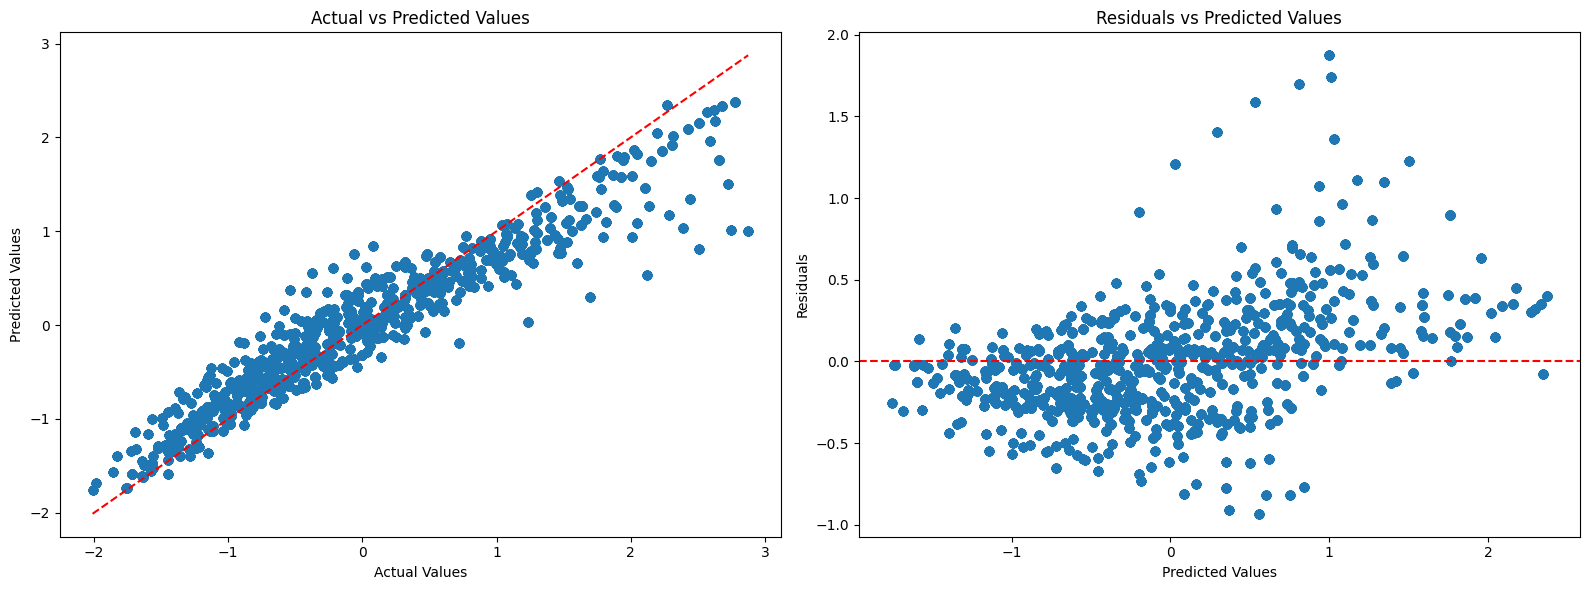

In [41]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of actual vs. predicted values
axs[0].scatter(Y_test, y_pred, alpha=0.7)
axs[0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Line of perfect prediction
axs[0].set_title('Actual vs Predicted Values')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')

# Residuals plot
residuals = Y_test - y_pred
axs[1].scatter(y_pred, residuals, alpha=0.7)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals vs Predicted Values')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# Building a model using the XGBRegressor and checking matrices

In [42]:
from xgboost import XGBRegressor
# Fit the regression model
xg = XGBRegressor()
xg.fit(X_train,Y_train)

# Make predictions
y_pred = xg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

# Generate a regression report
print("Regression Model Performance Report:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Regression Model Performance Report:
Mean Absolute Error (MAE): 0.0056
Mean Squared Error (MSE): 0.0001
Root Mean Squared Error (RMSE): 0.0078
R² Score: 0.9999


In [43]:

from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(rf, X, Y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cross_val_scores}")
print(f"Mean Cross-validated R² score: {cross_val_scores.mean():.4f}")



Cross-validated R² scores: [1. 1. 1. 1. 1.]
Mean Cross-validated R² score: 1.0000


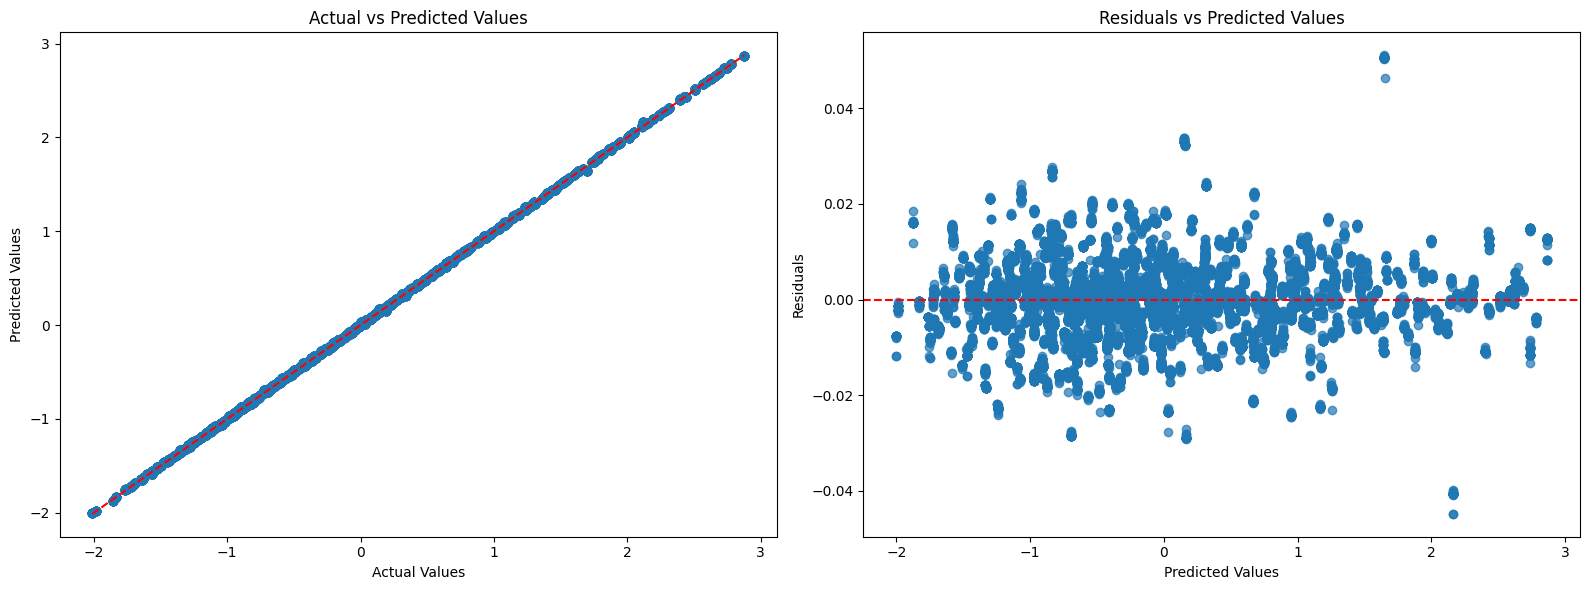

In [44]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of actual vs. predicted values
axs[0].scatter(Y_test, y_pred, alpha=0.7)
axs[0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Line of perfect prediction
axs[0].set_title('Actual vs Predicted Values')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')

# Residuals plot
residuals = Y_test - y_pred
axs[1].scatter(y_pred, residuals, alpha=0.7)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals vs Predicted Values')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# Building a model using the CatBoostRegressor and checking matrices

In [45]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fit the CatBoostRegressor model
catboost = CatBoostRegressor(verbose=0)  # verbose=0 to suppress training output
catboost.fit(X_train, Y_train)

# Make predictions
y_pred = catboost.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

# Generate a regression report
print("CatBoostRegressor Model Performance Report:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


CatBoostRegressor Model Performance Report:
Mean Absolute Error (MAE): 0.0041
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0055
R² Score: 1.0000


In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fit the KNeighborsRegressor model
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

# Generate a regression report
print("KNeighborsRegressor Model Performance Report:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


KNeighborsRegressor Model Performance Report:
Mean Absolute Error (MAE): 0.1999
Mean Squared Error (MSE): 0.0799
Root Mean Squared Error (RMSE): 0.2826
R² Score: 0.9193


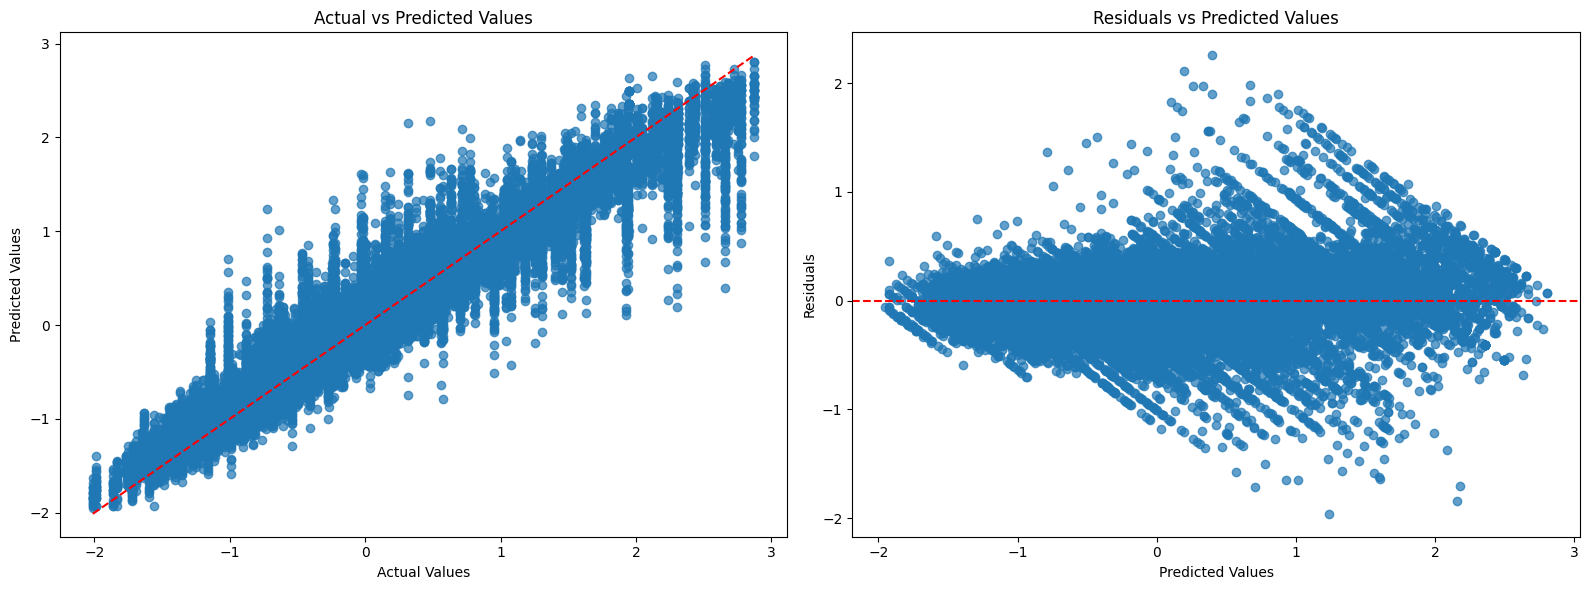

In [47]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of actual vs. predicted values
axs[0].scatter(Y_test, y_pred, alpha=0.7)
axs[0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Line of perfect prediction
axs[0].set_title('Actual vs Predicted Values')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')

# Residuals plot
residuals = Y_test - y_pred
axs[1].scatter(y_pred, residuals, alpha=0.7)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals vs Predicted Values')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# Choosing the final model and saving

In [48]:
X_train.head()

,Company Name,Car Name,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Transmission Type,Registration Certificate,Music System,Sunroof,Alloy Wheels,GPS,Leather Seats
103105,2,33,1,0,0.803315,0,6,0.981394,0,0,1,0,1,0,0
285718,9,45,0,2,-1.529312,3,0,-1.280204,1,0,1,0,1,0,1
184312,5,32,1,1,-1.140541,0,9,-0.994390,3,1,1,1,0,1,0
273261,2,9,0,1,-1.140541,1,4,0.417093,1,0,0,1,1,0,1
110759,8,38,0,2,0.025773,1,0,-1.426462,2,0,0,1,0,0,0


In [49]:
import joblib
joblib.dump(xgb, '/Users/sharumathan/Desktop/Punda/EDITH_FDM/model_2.pkl')

['/Users/sharumathan/Desktop/Punda/EDITH_FDM/model_2.pkl']

In [50]:
import joblib
import pandas as pd
m_odel = joblib.load('/Users/sharumathan/Desktop/Punda/EDITH_FDM/model_2.pkl')



In [51]:
predicted_price = m_odel.predict(pd.DataFrame([[5,	52,	1,	2,	0.806061,	1,	9	,-1.264661,	0,	0	,0	,1	,1	,1	,0]]))
predicted_price


/Users/sharumathan/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.12322208])

In [52]:
import sklearn
print(sklearn.__version__)


1.5.2
